In [1]:
# Importing al libraries
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

In [2]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk
from nltk.corpus import stopwords

In [18]:
#load the dataset into dataframe
mbti_df = pd.read_csv("dataset/mbti_1.csv")

In [19]:
#First 5 rows of dataset is as follows
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [11]:
mbti_df.shape

(8675, 6)

In [22]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8664 entries, 0 to 8674
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8664 non-null   object
 1   posts   8664 non-null   object
 2   I/E     8664 non-null   object
 3   N/S     8664 non-null   object
 4   F/T     8664 non-null   object
 5   P/J     8664 non-null   object
dtypes: object(6)
memory usage: 473.8+ KB


In [9]:
mbti_df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'If I met myself my immediate reaction would b...
freq,1832,1


In [21]:
#Check for null values
print("Null Values: \n")
print(mbti_df.isnull().sum())

#Plotting frequency of different categories
countCategory=mbti_df.type.value_counts()
print('\n')

print("No of posts for each mbti Personality: \n")
print(countCategory)

Null Values: 

type     0
posts    0
I/E      0
N/S      0
F/T      0
P/J      0
dtype: int64


No of posts for each mbti Personality: 

INFP    1828
INFJ    1470
INTP    1304
INTJ    1091
ENTP     683
ENFP     673
ISTP     337
ISFP     269
ENTJ     230
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


In [20]:
mbti_df = mbti_df.dropna()

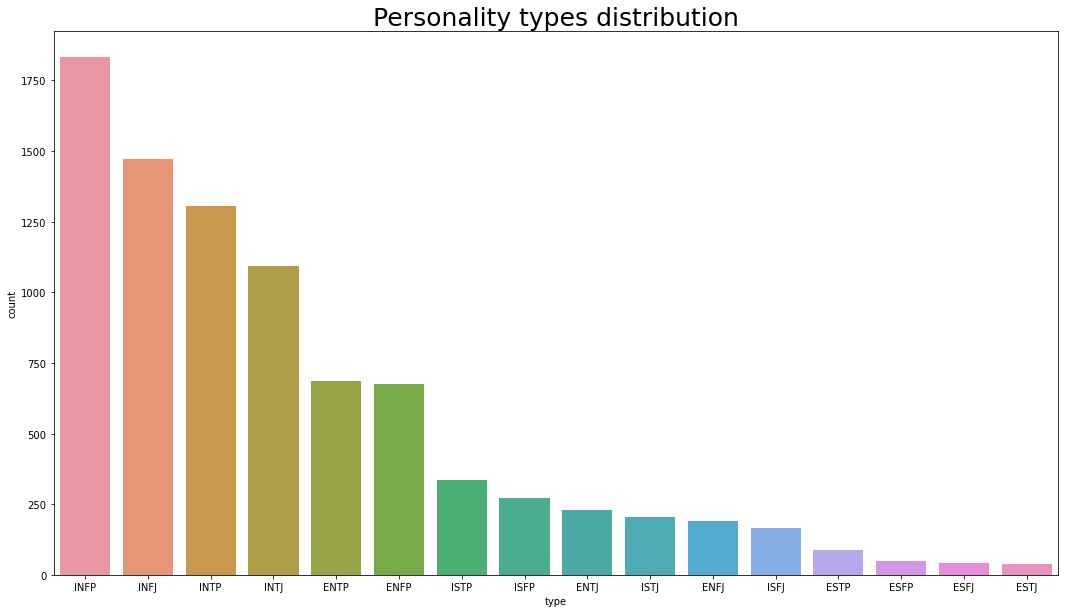

In [11]:
#Plot to show above inference
plt.figure(figsize=(18,10))
sns.countplot(x='type', data=mbti_df, order=mbti_df.type.value_counts().index, orient='v')
sns.set_context('talk')
plt.title('Personality types distribution', fontsize=25)
plt.savefig('mbti_count.png')
plt.show()

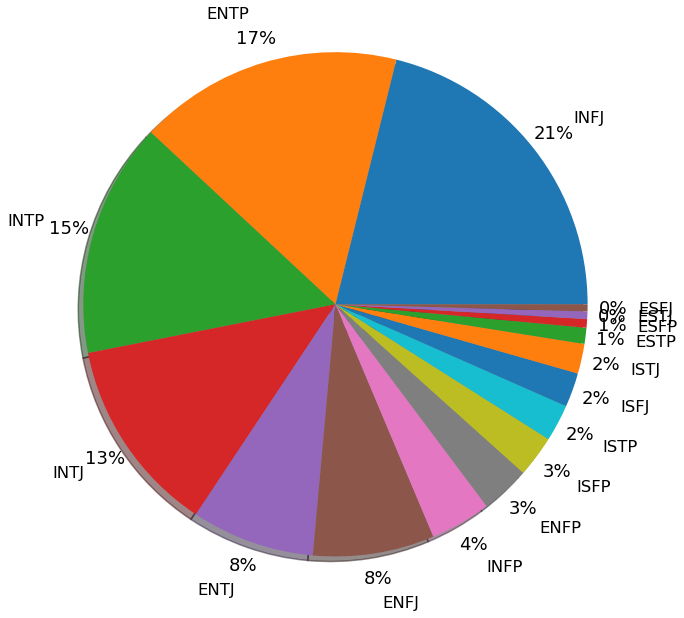

In [12]:
plt.figure(figsize=(10, 10))
plt.pie(mbti_df.type.value_counts(),labels=mbti_df['type'].unique(), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,shadow=True)
plt.axis('equal')
plt.show()

In [22]:
#Data PreProcessing
#Removing URLs
mbti_df['posts'] = mbti_df['posts'].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

In [23]:
#Removing End Tokens like '?', ',' '.'
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'\.', ' ', x + " "))
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'\?', ' ', x + " "))
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'!', ' ', x + " "))

In [24]:
#Remove words that contain digits
mbti_df['posts'] = mbti_df['posts'].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))
#Lower casing words
mbti_df['posts'] = mbti_df['posts'].apply(lambda x: x.lower())

In [25]:
#Removing multiple letters repeating words
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x))

In [26]:
#Remove parenthesis
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub('(\[|\()*\d+(\]|\))*', ' ', x))
#Remove spaces more than 1
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(' +', ' ', x).lower())

In [27]:
# Lemmatization
mbti_df['posts'] = mbti_df['posts'].apply(lambda x: WordNetLemmatizer().lemmatize(x))

In [28]:
mbti_df.head()

,type,posts
0,INFJ,enfp and intj moments sportscenter not top te...
1,ENTP,im finding the lack of me in these posts very ...
2,INTP,good one of course to which i say i know thats...
3,INTJ,dear intp i enjoyed our conversation the other...
4,ENTJ,youre fired thats another silly misconception ...


In [23]:
mbti_df.to_csv('mbti_1_preprocessed.csv',index=False)

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Y= label_encoder.fit_transform(mbti_df['type'])

In [32]:
#Splitting the dataset into 70-30 % ratio
X_train, X_test, y_train, y_test = train_test_split(mbti_df['posts'], Y, test_size=0.33, stratify=Y, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(5812,) (5812,) (2863,) (2863,)


In [33]:
#Implementing TF-IDF
#Vectorizing posts along with filtering stop words
vectorizer = TfidfVectorizer(stop_words='english')

#Fitting on training dataset
mbti_tfidf = vectorizer.fit(X_train)

#Performing transformation on train and test set
X_train_tfidf = mbti_tfidf.transform(X_train)
X_test_tfidf = mbti_tfidf.transform(X_test)

In [25]:
X_train_tfidf.shape

(5812, 81787)

In [26]:
X_test_tfidf.shape

(2863, 81787)

In [27]:
#Implementing Models

#Support Vector Machine
basef1_tfidf = {}

svm = SVC(random_state = 1)
svm.fit(X_train_tfidf, y_train)

SVC(random_state=1)

In [28]:
Y_pred = svm.predict(X_test_tfidf)

# find predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
basef1_tfidf['SVM'] = score* 100.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      0.24      0.35       223
           2       1.00      0.01      0.03        76
           3       0.60      0.28      0.38       226
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        29
           8       0.60      0.55      0.57       485
           9       0.41      0.89      0.56       605
          10       0.65      0.50      0.56       360
          11       0.53      0.74      0.62       430
          12       0.50      0.02      0.04        55
          13       0.50      0.02      0.04        89
          14       0.50      0.01      0.03        68
          15       0.77      0.18      0.29       111

    accuracy                           0.50      2863
   macro avg       0.42   

In [29]:
#Random Forest 
random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train_tfidf, y_train)

# make predictions for test data#KNN Classifier for TF-IDF
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 200)  # n_neighbors means k
knn.fit(X_train_tfidf, y_train)

Y_pred = knn.predict(X_test_tfidf)
# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
Newf1_tfidf['KNN'] = score* 100.0
Y_pred = random_forest.predict(X_test_tfidf)

# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
basef1_tfidf['Random Forest'] = score* 100.0

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.53      0.08      0.14       223
           2       0.00      0.00      0.00        76
           3       0.53      0.07      0.12       226
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        29
           8       0.42      0.52      0.47       485
           9       0.33      0.86      0.48       605
          10       0.55      0.30      0.39       360
          11       0.53      0.55      0.54       430
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00        68
          15       0.00      0.00      0.00       111

    accuracy                           0.40      2863
   macro avg       0.18   

In [31]:
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 200)  # n_neighbors means k
knn.fit(X_train_tfidf, y_train)

Y_pred = knn.predict(X_test_tfidf)
# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
basef1_tfidf['KNN'] = score* 100.0

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.50      0.01      0.02       223
           2       0.00      0.00      0.00        76
           3       1.00      0.00      0.01       226
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        29
           8       0.18      0.91      0.30       485
           9       0.36      0.19      0.24       605
          10       0.29      0.01      0.01       360
          11       0.34      0.03      0.06       430
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00        68
          15       1.00      0.01      0.02       111

    accuracy                           0.20      2863
   macro avg       0.23   

In [32]:
#Analysis of Baseline Models
pd.DataFrame.from_dict(basef1_tfidf, orient='index', columns=['F1-Score Achieved'])

,F1-Score Achieved
SVM,50.471533
Random Forest,40.202585
KNN,20.048900


In [33]:
#MBTI across 4 axis
#All the ML models that I have applied have given F1 score of around 0.5 which is not good.
#So instead of training model on all 16 types of personalities, I'll now try to train models on 4 classifiers individually for better predictions.

#16 Personality types across 4 axis :
#Introversion (I) – Extroversion (E)
#Intuition (N) – Sensing (S)
#Thinking (T) – Feeling (F)
#Judging (J) – Perceiving (P)

In [7]:
mbti_df['I/E'] = mbti_df.type
mbti_df['N/S'] = mbti_df.type
mbti_df['F/T'] = mbti_df.type
mbti_df['P/J'] = mbti_df.type

for i, t in enumerate(mbti_df.type):
    if 'I' in t:
        mbti_df['I/E'][i] = 'I'
    elif 'E' in t:
        mbti_df['I/E'][i] = 'E'
        
    if 'N' in t:
        mbti_df['N/S'][i] = 'N'
    elif 'S' in t:
        mbti_df['N/S'][i] = 'S'
        
    if 'F' in t:
        mbti_df['F/T'][i] = 'F'
    elif 'T' in t:
        mbti_df['F/T'][i] = 'T'
        
    if 'P' in t:
        mbti_df['P/J'][i] = 'P'
    elif 'J' in t:
        mbti_df['P/J'][i] = 'J'


posts = mbti_df.posts.values
yIE = mbti_df['I/E'].values
yNS = mbti_df['N/S'].values
yFT = mbti_df['F/T'].values
yPJ = mbti_df['P/J'].values
y = mbti_df.type

In [35]:
mbti_df.head()

,type,posts,I/E,N/S,F/T,P/J
0,INFJ,enfp and intj moments sportscenter not top te...,I,N,F,J
1,ENTP,im finding the lack of me in these posts very ...,E,N,T,P
2,INTP,good one of course to which i say i know thats...,I,N,T,P
3,INTJ,dear intp i enjoyed our conversation the other...,I,N,T,J
4,ENTJ,youre fired eostokendot thats another silly mi...,E,N,T,J


In [36]:
print("Frequency :")
print("-------------------------------------------------------")
print ("Introversion (I) /  Extroversion (E):   ", mbti_df['I/E'].value_counts()['I'], " / ", mbti_df['I/E'].value_counts()['E'])
print ("Intuition (N) / Sensing (S):            ", mbti_df['N/S'].value_counts()['N'], " / ", mbti_df['N/S'].value_counts()['S'])
print ("Thinking (T) / Feeling (F):             ", mbti_df['F/T'].value_counts()['F'], " / ", mbti_df['F/T'].value_counts()['T'])
print ("Judging (J) / Perceiving (P):           ", mbti_df['P/J'].value_counts()['P'], " / ", mbti_df['P/J'].value_counts()['J'])

Frequency :
-------------------------------------------------------
Introversion (I) /  Extroversion (E):    6676  /  1999
Intuition (N) / Sensing (S):             7478  /  1197
Thinking (T) / Feeling (F):              4694  /  3981
Judging (J) / Perceiving (P):            5241  /  3434


In [25]:
mbti_df = pd.read_csv("dataset/mbti_1_preprocessed.csv")

In [26]:
mbti_df.head()

,type,posts,I/E,N/S,F/T,P/J
0,INFJ,enfp and intj moments sportscenter not top te...,I,N,F,J
1,ENTP,im finding the lack of me in these posts very ...,E,N,T,P
2,INTP,good one of course to which i say i know thats...,I,N,T,P
3,INTJ,dear intp i enjoyed our conversation the other...,I,N,T,J
4,ENTJ,youre fired thats another silly misconception ...,E,N,T,J


In [27]:
cv = CountVectorizer(stop_words='english', max_features=1500) 
xCV = cv.fit_transform(mbti_df['posts'])
tfidf = TfidfTransformer()

print("Now the dataset size is as below")
X_tfidf =  tfidf.fit_transform(xCV).toarray()
print(X_tfidf.shape)

Now the dataset size is as below
(8664, 1500)


In [32]:
pkl.dump(cv, open('count_vectorizer.pkl', 'wb'))

In [33]:
pkl.dump(xCV, open('XCount_Vectorizer.pkl', 'wb'))
pkl.dump(tfidf, open('TfidfTransformer.pkl', 'wb'))

In [7]:
posts = mbti_df.posts.values
yIE = mbti_df['I/E'].values
yNS = mbti_df['N/S'].values
yFT = mbti_df['F/T'].values
yPJ = mbti_df['P/J'].values
y = mbti_df.type

In [8]:
#splitted the data with 75:25 train-test ratio.
#For handling Imbalancement of data,stratify parameter is used

xIETrain, xIETest, yIETrain, yIETest = train_test_split(X_tfidf, yIE, test_size=0.25,stratify=yIE)
xNSTrain, xNSTest, yNSTrain, yNSTest = train_test_split(X_tfidf, yNS, test_size=0.25,stratify=yNS)
xFTTrain, xFTTest, yFTTrain, yFTTest = train_test_split(X_tfidf, yFT, test_size=0.25,stratify=yFT)
xPJTrain, xPJTest, yPJTrain, yPJTest = train_test_split(X_tfidf, yPJ, test_size=0.25,stratify=yPJ)

In [9]:
#building models
#SVM for TF-IDF

svm1 = SVC(random_state = 1)
svmIE= svm1.fit(xIETrain,yIETrain)

svm2 = SVC(random_state = 1)
svmNS= svm2.fit(xNSTrain,yNSTrain)

svm3 = SVC(random_state = 1)
svmFT= svm3.fit(xFTTrain,yFTTrain)

svm4 = SVC(random_state = 1)
svmPJ= svm4.fit(xPJTrain,yPJTrain)

In [11]:
Y_pred_IE = svmIE.predict(xIETest)
Y_pred_NS = svmNS.predict(xNSTest)
Y_pred_FT = svmFT.predict(xFTTest)
Y_pred_PJ = svmPJ.predict(xPJTest)

In [12]:
print("Results : Testing")
print("------------------")

print("I/E :")
f1_svmIE=f1_score(yIETest, Y_pred_IE, average='micro')
print(f1_svmIE)
print("N/S :")
f1_svmNS=f1_score(yNSTest, Y_pred_NS, average='micro')
print(f1_svmNS)
print("F/T :")
f1_svmFT=f1_score(yFTTest, Y_pred_FT, average='micro')
print(f1_svmFT)
print("P/J :")
f1_svmPJ=f1_score(yPJTest, Y_pred_PJ, average='micro')
print(f1_svmPJ)

Results : Testing
------------------
I/E :
0.8176361957525392
N/S :
0.8859649122807017
F/T :
0.8217913204062789
P/J :
0.765004616805171


In [13]:
pkl.dump(svm1, open('SVM_IE_model.pkl', 'wb'))
pkl.dump(svm2, open('SVM_NS_model.pkl', 'wb'))
pkl.dump(svm3, open('SVM_FT_model.pkl', 'wb'))
pkl.dump(svm4, open('SVM_PJ_model.pkl', 'wb'))

In [39]:
#Random Forest

rf1 = RandomForestClassifier(n_estimators=100, random_state = 1)
rfIE= rf1.fit(xIETrain,yIETrain)

rf2 = RandomForestClassifier(n_estimators=100, random_state = 1)
rfNS= rf2.fit(xNSTrain,yNSTrain)

rf3 = RandomForestClassifier(n_estimators=100, random_state = 1)
rfFT= rf3.fit(xFTTrain,yFTTrain)

rf4 = RandomForestClassifier(n_estimators=100, random_state = 1)
rfPJ= rf4.fit(xPJTrain,yPJTrain)

In [40]:
Y_pred_IE = rfIE.predict(xIETest)
Y_pred_NS = rfNS.predict(xNSTest)
Y_pred_FT = rfFT.predict(xFTTest)
Y_pred_PJ = rfPJ.predict(xPJTest)

In [41]:
print("Results : Testing")
print("------------------")

print("I/E :")
f1_rfIE=f1_score(yIETest, Y_pred_IE, average='micro')
print(f1_rfIE)
print("N/S :")
f1_rfNS=f1_score(yNSTest, Y_pred_NS, average='micro')
print(f1_rfNS)
print("F/T :")
f1_rfFT=f1_score(yFTTest, Y_pred_FT, average='micro')
print(f1_rfFT)
print("P/J :")
f1_rfPJ=f1_score(yPJTest, Y_pred_PJ, average='micro')
print(f1_rfPJ)

Results : Testing
------------------
I/E :
0.7853185595567869
N/S :
0.8656509695290857
F/T :
0.7959372114496767
P/J :
0.7363804247460757


In [42]:
#KNN Classifier for TF-IDF

knn1 = KNeighborsClassifier(n_neighbors = 250)  # n_neighbors means k
knnIE = knn1.fit(xIETrain,yIETrain)

knn2 = KNeighborsClassifier(n_neighbors = 250)  # n_neighbors means k
knnNS = knn2.fit(xNSTrain,yNSTrain)

knn3 = KNeighborsClassifier(n_neighbors = 250)  # n_neighbors means k
knnFT = knn3.fit(xFTTrain,yFTTrain)

knn4 = KNeighborsClassifier(n_neighbors = 250)  # n_neighbors means k
knnPJ = knn4.fit(xPJTrain,yPJTrain)

In [43]:
Y_pred_IE = knnIE.predict(xIETest)
Y_pred_NS = knnNS.predict(xNSTest)
Y_pred_FT = knnFT.predict(xFTTest)
Y_pred_PJ = knnPJ.predict(xPJTest)

In [44]:
print("Results : Testing")
print("------------------")

print("I/E :")
f1_knnIE=f1_score(yIETest, Y_pred_IE, average='micro')
print(f1_knnIE)
print("N/S :")
f1_knnNS=f1_score(yNSTest, Y_pred_NS, average='micro')
print(f1_knnNS)
print("F/T :")
f1_knnFT=f1_score(yFTTest, Y_pred_FT, average='micro')
print(f1_knnFT)
print("P/J :")
f1_knnPJ=f1_score(yPJTest, Y_pred_PJ, average='micro')
print(f1_knnPJ)

Results : Testing
------------------
I/E :
0.7746999076638966
N/S :
0.8619575253924283
F/T :
0.6191135734072022
P/J :
0.6537396121883656


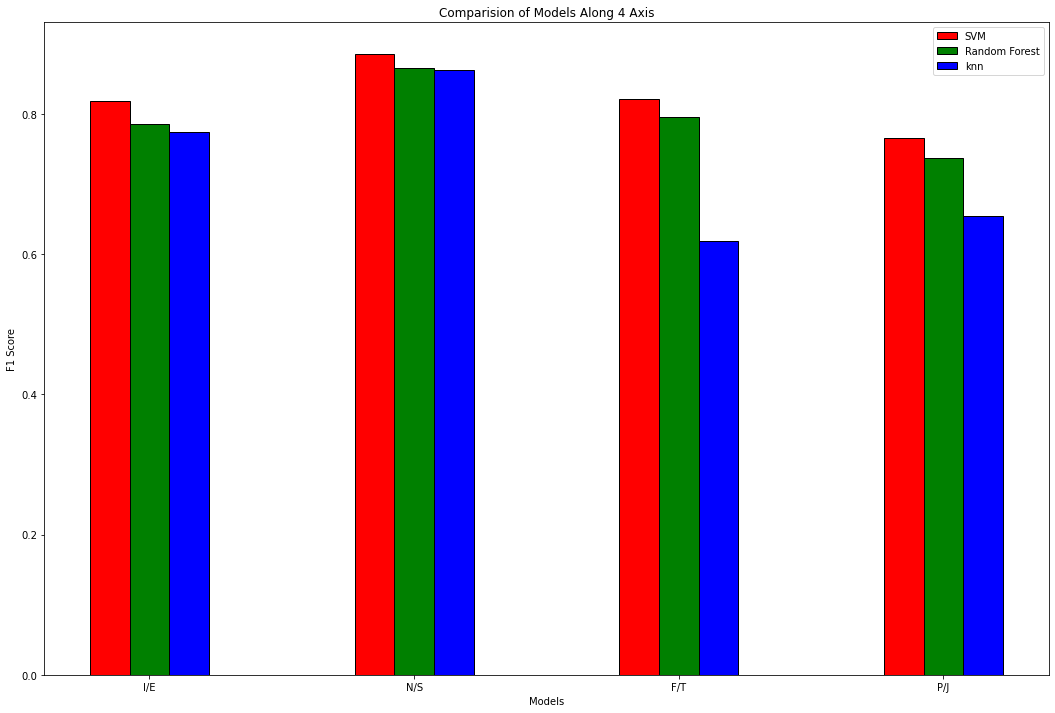

In [62]:
#Plot for comparision between models

X = ['I/E','N/S', 'F/T', 'P/J']
ySVM = [f1_svmIE,f1_svmNS,f1_svmFT,f1_svmPJ]
yRF = [f1_rfIE,f1_rfNS,f1_rfFT,f1_rfPJ]
yKNN = [f1_knnIE,f1_knnNS,f1_knnFT,f1_knnPJ]

X_axis = np.arange(len(X))
plt.figure(figsize=(18,12))   
plt.bar(X_axis - 0.15, ySVM, 0.15, label = 'SVM',color = 'r',edgecolor = 'black')
plt.bar(X_axis - 0.0, yRF, 0.15, label = 'Random Forest',color = 'g',edgecolor = 'black')
plt.bar(X_axis + 0.15, yKNN, 0.15, label = 'knn',color = 'b',edgecolor = 'black')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Comparision of Models Along 4 Axis")
plt.legend()

plt.show()

In [ ]:
#SVM is out-performing all other models along all the MBTI axis
#So SVM is considered as final model.

In [5]:
#Personality Prediction of an example which is a known INFJ
statement= "I have been try to meet you but stuck in some work ||| I am really concern about him for his bad health ||| I will get some time from my busy schedule to plant trees around you so that you will be more benefited.||| He is so sweet in nature ||| I like to wear good apperals. I love to travel and i went to California once where I enjoyed a lot. I wanna do cooking in most of my free time"
statement2 = "I fully believe in the power of being a protector, to give a voice to the voiceless. So in that spirit I present this film, and hope it it recieved in the spirit of compassion.  Om Mani Padme Hum ...|||Yes, you are quite right. But many times this help has to come from outside the relationship. A partner can be supportive, and helpful but I think getting the right help is critical.  Finding a good...|||If he doesn't feel worthy of being loved, nothing you say or do will make a difference.|||Bossy1,  I think Jawz is very much on to something here, and further I think this is indicative of much deeper issues that were around long before you two met. It very well might mean your friend...|||LookingGlass,  Thanks for making this point. Unfortunately this corrupted Christianity speaks with a very loud voice, so the Still Small Voice has been forgotten.  Very few Christians today have...|||This has been my curse as well and I gotta tell you, most people prefer to remain stuck in their own neuroses, with all the excuses that go along with that. Of course in spite of all the scars I've...|||I know this must be very painful Callie, but honestly I think you dodged a bullet here. I'm sure he's a good person but it sounds as if he has some emotional maturing to do.  Being involved with...|||You guys are singing my song :)  I've been doing some research on heuristics (mental shortcuts) and cognitive biases, that explain a lot of why people do what they do. For some it's the principle of...|||I empathize with the sentiment behind this, but I think truly that while religion contains much of what we need as a society, it can easily be manipulated and used as a control. This is the dualistic...|||I think sometimes we forget that our type is only one part of what makes us a person. Emotional and Social competencies, past hurts and issues, value memes, etc.. I saw an experiment in a crowded...|||I don't feel rare as much as I feel well done.|||Thank you UK, you sound like a reasonable and compassionate person. I think Neitzsche's quote: Beware if you fight monsters lest you become one in the process is appropriate here. Here in Colorado...|||It might surprise you to learn that cognitive brain science has discovered that we humans are actually hard-wired for empathy. Read Goleman's Social Intelligence and it will help you to understand...|||You must understand, Aegis is really not to blame. Yes he seems like an inhuman monster for trying to justify marginalizing another human being, but people like that really don't understand what they...|||You know these ideas of yours are so riddled with fallacy and linquistic manipulation it isn't worth my time to continue this conversation. Hopefully as the years pass by you can learn to think and...|||An elephant swallowed by a boa constrictor!  Love that book!  I cried a little at the end.|||A thoughtful philosophy to be sure, and I like the line from  The Little Prince in your signature block, I used to use it as well :)|||.  According to your logic on tolerance we should accept intolerance if we are to consider ourselves tolerant?      Homosexuality is not violent behavior, conflating the two is extremely...|||Okay guys, for the record, I think healthy debate can help us all to move forward beyond the simple heuristics and the accompanying cognitive bias that is prevalent in religion. Critical thinking...|||Looks like this has already been explained, and I'm sorry I didn't notice the post, didn't mean to ignore you.  The teleological argument definitely has a major flaw in that the conclusion drawn...|||Okay first, you have attributed someone else's quote to me. Second this is what you had a problem with:   This post is what you say is a logical fallacy by introducing the straw-man of the...|||No problem, just look into this light for a moment...|||Re-framing the argument. No one introduced the idea of being tolerant of everything.  Clever use of the slippery slope though.  Don't blame you for not touching gay marriage, there is no good...|||I would not go so far as to say faith and reason are inherently contradictory which is why I worded my post the way I did. You must understand I have spent most of my life studying religion and...|||No one is supposed to know about the Inner Council !  we can't have people aware that we can communicate telepathically with each other, for years we have disguised ourselves as regular folk and...|||So who gets to decide what is good for us?  And I wouldn't go around using words like logic where religion is concerned, there is little in religion that can stand up to critical inquiry.|||Old School INFJ theme song: Veteran of the Psychic Wars, Blue Oyster Cult|||Okay, but what with the world being bullshit, I'm gonna have to change my whole frame of reference. Up to this point I've been operating under the thought that the world is a vampire :p|||Define getting older :P  For most of my life it seems I tried to squeeze myself into the roles that I thought I needed to in order to get along. I think many people here know what it's like to...|||You have quite a full plate there pardner ;)  Pretty typical though, I'll bet there is more stuff going on inside you than you can reasonably articulate.  This is what I love about this...|||I like the cards that don't have anything written in them so you can be creative. After an argument with my wife I found one with a little dog on the front, and I wrote: if i ran away, and you...|||Love this thread! :)  Over the years I have practiced many religions and philosophies, I think being an INFJ means being an explorer to some extent. During each phase of my explorations I practiced...|||I think I hate that crap because it is meaningless and empty and usually used to make people feel good about themselves.  The truth is most people are self-centered and don't understand love and...|||I understand. It bothers me a lot sometimes because I can walk around the store feeling angry and judgmental and that just adds up to sapped energy and a feeling that I don't like myself very much...|||The great sage Linus Van Pelt once said:  I love mankind, it's people I can't stand  I have always found myself on the other end of that. Individually I love people, but in a group they can be...|||Funny how you can see that coming a long ways off. Sometimes I try to talk myself out of it, like oh man you don't know that for sure give her a chance but it most always comes back to the first...|||According to cognitive brain science, when you are truly in tune with another human being there is a synchrony in our brain waves.  With the discovery of Mirror Neurons we can see just how that...|||Looks like you have stumbled upon what Buddhists call the First Noble Truth :)|||Okay, I'm gonna say something that might sound lame, but here goes:  You are never going to find out who you are because what that really is keeps changing and growing, this is the nature of...|||Ever try to make friends with a stray cat? The same rules apply, don't chase us, we will run, just provide a safe and friendly harbor and watch how quickly we become affectionate.|||Well, if you really like someone's post you can thank them, un thank them just so you can thank them again!|||Oh and Chazz? That feeling comes and goes, I wouldn't put too much meaning on it. Ever since I can remember I never felt like I belonged anywhere. As a child I had the impression that my presence on...|||Okay, totally agree with your post... but I couldn't help getting a visual on an Intimidating Typist I keep seeing Roz from Monsters Inc.|||It takes a little time to tell the difference between an anxious perception and a clear intuition. That being said, even after all these years I do manage to screw it up royally at times. :P|||Great movies all!  I think the movie that still moves me the most is  Wings Of Desire  This film was done old school style even for the 80s, directed by Wim Wenders and featuring the talent of...|||I'm not sure if you experience this, or maybe because I'm middle aged that I see things this way. I have been a musician, artist, salesman, soldier, nurse (CNA), technician, Christian, Buddhist,...|||I first found out about mirror neurons from reading Daniel Goleman's Social Intelligence  though the credit for the research goes to an Italian research scientist whose name escapes me for the...|||Aint it fun to be us?  :P  I've been doing some reading on mirror neurons and how when we are genuinely engaged with another human being our brains are actually in sync.    Now to me that is...|||Has anyone compiled information about linking MB types and Soma types?|||I wonder if our expectations of ourselves are a little unrealistic at times. Sometimes I feel emotionally raw and wounded and need to withdraw. Oddly enough at times like that there is a little...'"

In [6]:
def preprocessing(data):
    #Data PreProcessing
    #Removing URLs
    data['posts'] = data['posts'].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    #Removing End Tokens like '?', ',' '.'
    data["posts"] = data["posts"].apply(lambda x: re.sub(r'\.', ' ', x + " "))
    data["posts"] = data["posts"].apply(lambda x: re.sub(r'\?', ' ', x + " "))
    data["posts"] = data["posts"].apply(lambda x: re.sub(r'!', ' ', x + " "))
    #Remove words that contain digits
    data['posts'] = data['posts'].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))
    #Lower casing words
    data['posts'] = data['posts'].apply(lambda x: x.lower())
    #Removing multiple letters repeating words
    data["posts"] = data["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x))
    #Remove parenthesis
    data["posts"] = data["posts"].apply(lambda x: re.sub('(\[|\()*\d+(\]|\))*', ' ', x))
    #Remove spaces more than 1
    data["posts"] = data["posts"].apply(lambda x: re.sub(' +', ' ', x).lower())
    # Lemmatization
    data['posts'] = data['posts'].apply(lambda x: WordNetLemmatizer().lemmatize(x))
    return data

In [7]:
data = [['xxxx',statement2]]
myStatement = pd.DataFrame(data,columns=['type','posts'])
my_posts = preprocessing(myStatement)

In [8]:
my_posts

,type,posts
0,xxxx,i fully believe in the power of being a protec...


In [9]:
SVM_IE = pkl.load(open('SVM_IE_model.pkl','rb'))
SVM_NS = pkl.load(open('SVM_NS_model.pkl','rb'))
SVM_FT = pkl.load(open('SVM_FT_model.pkl','rb'))
SVM_PJ = pkl.load(open('SVM_PJ_model.pkl','rb'))

In [10]:
cv = pkl.load(open('count_vectorizer.pkl','rb'))
xCV = cv.transform(my_posts['posts'])
tfidf = pkl.load(open('tfidfTransformer.pkl','rb'))
X_tfidf =  tfidf.transform(xCV).toarray()

Y_pred_IE = SVM_IE.predict(X_tfidf)
Y_pred_NS = SVM_NS.predict(X_tfidf)
Y_pred_FT = SVM_FT.predict(X_tfidf)
Y_pred_PJ = SVM_PJ.predict(X_tfidf)

In [11]:
Y_pred_IE

array(['I'], dtype=object)

In [12]:
Y_pred_NS

array(['N'], dtype=object)

In [13]:
Y_pred_FT

array(['F'], dtype=object)

In [14]:
Y_pred_PJ

array(['J'], dtype=object)

In [15]:
np.array_str(Y_pred_IE).replace("['", "").replace("']", "")+np.array_str(Y_pred_NS).replace("['", "").replace("']", "")+np.array_str(Y_pred_FT).replace("['", "").replace("']", "")+np.array_str(Y_pred_PJ).replace("['", "").replace("']", "")

'INFJ'